![my picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)

- apple width ≈ 6cm
- apple length ≈ 6cm
- banana width ≈ 4cm
- banana length ≈ 8cm

apple:0 - banana:1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
apple_width = np.random.normal(6, 1, N)
apple_length = np.random.normal(6, 1, N)
banana_width = np.random.normal(4, 1, N)
banana_length = np.random.normal(8, 1, N)

In [3]:
x_width = 3
x_length = 9

In [4]:
y_width = 7
y_length = 5

In [5]:
z_width = 5
z_length = 7

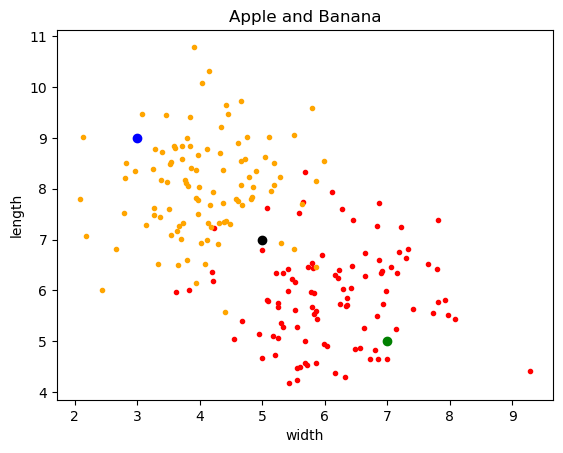

In [6]:
plt.scatter(apple_width, apple_length, c='red', marker='.')
plt.scatter(banana_width, banana_length, c='orange', marker='.')
plt.scatter(x_width, x_length, c='blue', marker='o')
plt.scatter(y_width, y_length, c='green', marker='o')
plt.scatter(z_width, z_length, c='black', marker='o')
plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

## KNN: K Nearest neighbors

In [7]:
width = np.concatenate((apple_width, banana_width))
length = np.concatenate((apple_length, banana_length))
# width.shape

X_train = np.array([width, length]).T
#X_train.shape
X_train

array([[ 5.71890665,  4.53071313],
       [ 5.24525182,  5.06084902],
       [ 5.68482005,  4.99940844],
       [ 8.07640367,  5.435546  ],
       [ 5.58369922,  7.52952971],
       [ 5.81928278,  5.94342987],
       [ 6.84009024,  7.26651436],
       [ 4.19944994,  6.36621158],
       [ 6.62009713,  5.25153388],
       [ 4.99729935,  6.7983778 ],
       [ 3.82657457,  6.00544586],
       [ 6.163526  ,  4.38252889],
       [ 5.17313513,  5.10084738],
       [ 5.42871839,  4.17789393],
       [ 6.2675873 ,  7.60483734],
       [ 7.3326556 ,  6.81040789],
       [ 5.41546539,  5.98647562],
       [ 5.80209403,  5.68161337],
       [ 4.21281018,  6.17953522],
       [ 7.22397934,  7.23985867],
       [ 7.64405443,  6.51054029],
       [ 6.89847264,  6.34509534],
       [ 7.7952191 ,  6.41968451],
       [ 6.28589697,  6.02573343],
       [ 6.21153033,  6.24083428],
       [ 7.80487645,  7.37838299],
       [ 5.88266863,  5.43486999],
       [ 5.52934339,  6.17385503],
       [ 5.8578087 ,

In [8]:
Y_apples = np.zeros(N, dtype='int')
Y_bananas = np.ones(N, dtype='int')
Y_train = np.concatenate((Y_apples, Y_bananas))
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [9]:
def euclidean_distance(x1, x2):
    return  np.sqrt(np.sum((x1 - x2)**2))

In [10]:
new_fruit = np.array([5, 7])

distances = []
for x in X_train:
    d = euclidean_distance(new_fruit, x)
    distances.append(d)

distances

[2.5718095641174625,
 1.9545984230294529,
 2.1145555272232945,
 3.4513440689251387,
 0.7881030960411012,
 1.3369983973273571,
 1.8592907194922113,
 1.0210622753360254,
 2.3836628296656537,
 0.2016402818777189,
 1.5382019259013542,
 2.8644279999314484,
 1.9070281750172906,
 2.8544845679275177,
 1.404494843309782,
 2.3403476882642065,
 1.0953735299369296,
 1.5432103349902035,
 1.1370269469113428,
 2.236876459536066,
 2.6889765056515005,
 2.008257576038448,
 2.854823264935768,
 1.6132967419971171,
 1.4297336584220477,
 2.8302836544621726,
 1.7968683507682455,
 0.9811829237155352,
 2.5701362153131244,
 1.7794298196347076,
 2.2809053704813813,
 2.3235431957119084,
 1.7145738560554793,
 1.5015695530582958,
 1.6413772930793882,
 2.828672061745986,
 2.3656245208396425,
 0.7328846482364273,
 1.4830055831541895,
 0.9151070647573352,
 2.3134958106705574,
 2.2542944813250454,
 1.815874852018569,
 1.3605431971517008,
 2.980708656216031,
 3.0777289327235344,
 0.989505578694652,
 1.2740200203881664,


In [11]:
k = 5
nearest_neighbors = np.argsort(distances)[0:k]
nearest_neighbors

array([  9, 103, 118, 140,  93], dtype=int64)

In [12]:
Y_train[167], Y_train[105], Y_train[10], Y_train[23], Y_train[118]

(1, 1, 0, 0, 1)

In [13]:
Y_train[nearest_neighbors]

array([0, 1, 1, 1, 0])

In [14]:
result = np.bincount(Y_train[nearest_neighbors])

In [15]:
if np.argmax(result) == 0:
    print('New Fruit is Apple')
else:
    print('New Fruit is Banana')

New Fruit is Banana
